In [1]:
import pandas as pd
data = pd.read_excel("framingham.xlsx")

In [2]:
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [5]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [9]:
data.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [11]:
data.isnull().sum().sum()

645

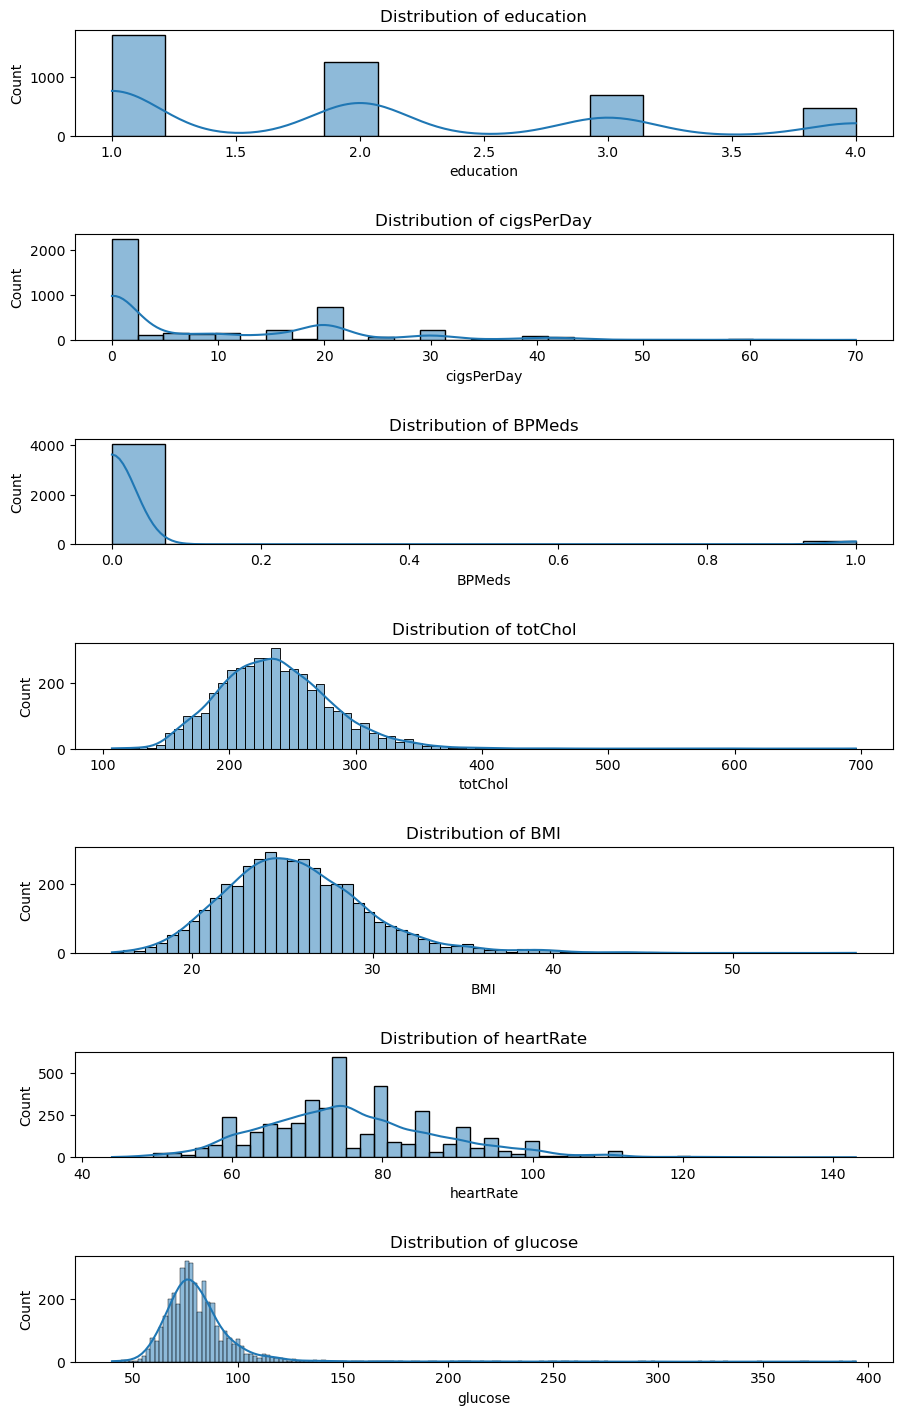

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns


cols_with_missing_values = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate', 'glucose']

# Plotting the distributions of columns with missing values
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
#plt.savefig("plot_image.png")
plt.show()

In [14]:
from sklearn.impute import SimpleImputer
# For normally distributed or symmetric continuous variables, we'll use the mean
# For skewed continuous variables and categorical variables, we'll use the median

# Imputer for mean
mean_imputer = SimpleImputer(strategy='mean')

# Columns to impute with mean (normally distributed/symmetric)
mean_cols = ['heartRate']

# Impute the columns with mean
data[mean_cols] = mean_imputer.fit_transform(data[mean_cols])

In [15]:
# Imputer for median
median_imputer = SimpleImputer(strategy='median')

# Columns to impute with median (skewed distributions or categorical)
median_cols = ['cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'glucose']

# Impute the columns with median
data[median_cols] = median_imputer.fit_transform(data[median_cols])

In [19]:
from sklearn.impute import SimpleImputer

# Imputer for mode
mode_imputer = SimpleImputer(strategy='most_frequent')

# Columns to impute with mode (e.g., categorical data like 'education')
mode_cols = ['education']

# Impute the columns with mode
data[mode_cols] = mode_imputer.fit_transform(data[mode_cols])

In [21]:
data.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [23]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.955189,0.494104,8.944340,0.029245,0.005896,0.310613,0.025708,236.667689,132.354599,82.897759,25.799005,75.878981,81.600943,0.151887
std,0.495027,8.572942,1.018522,0.500024,11.904777,0.168513,0.076569,0.462799,0.158280,44.328480,22.033300,11.910394,4.070775,12.023929,22.860340,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


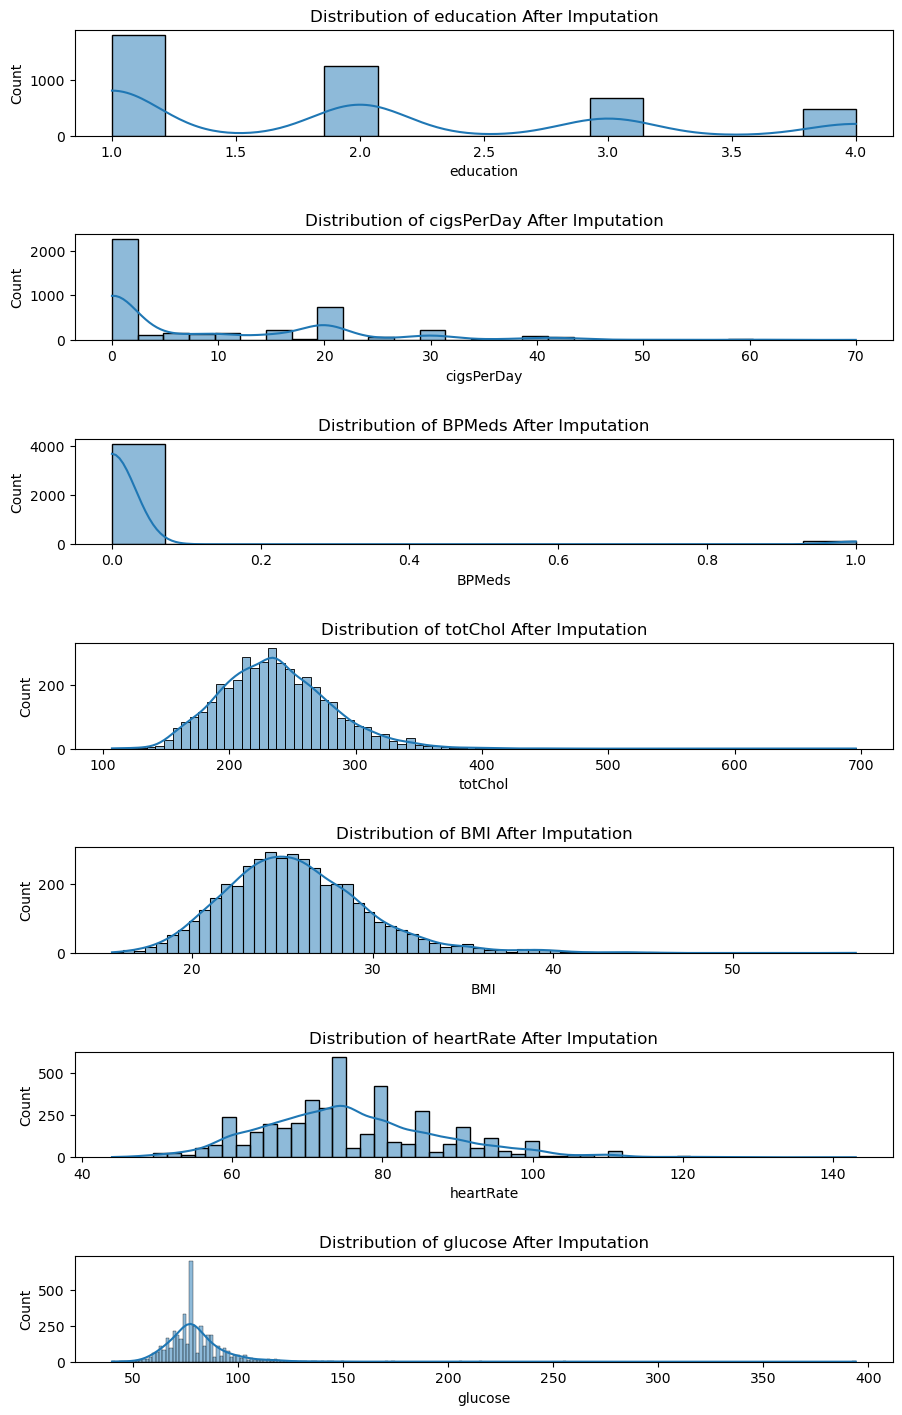

In [25]:
# Plotting the distributions after imputation
fig, axes = plt.subplots(len(cols_with_missing_values), 1, figsize=(10, 15))
fig.tight_layout(pad=5.0)

for i, col in enumerate(cols_with_missing_values):
    sns.histplot(data[col], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col} After Imputation')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

plt.show()

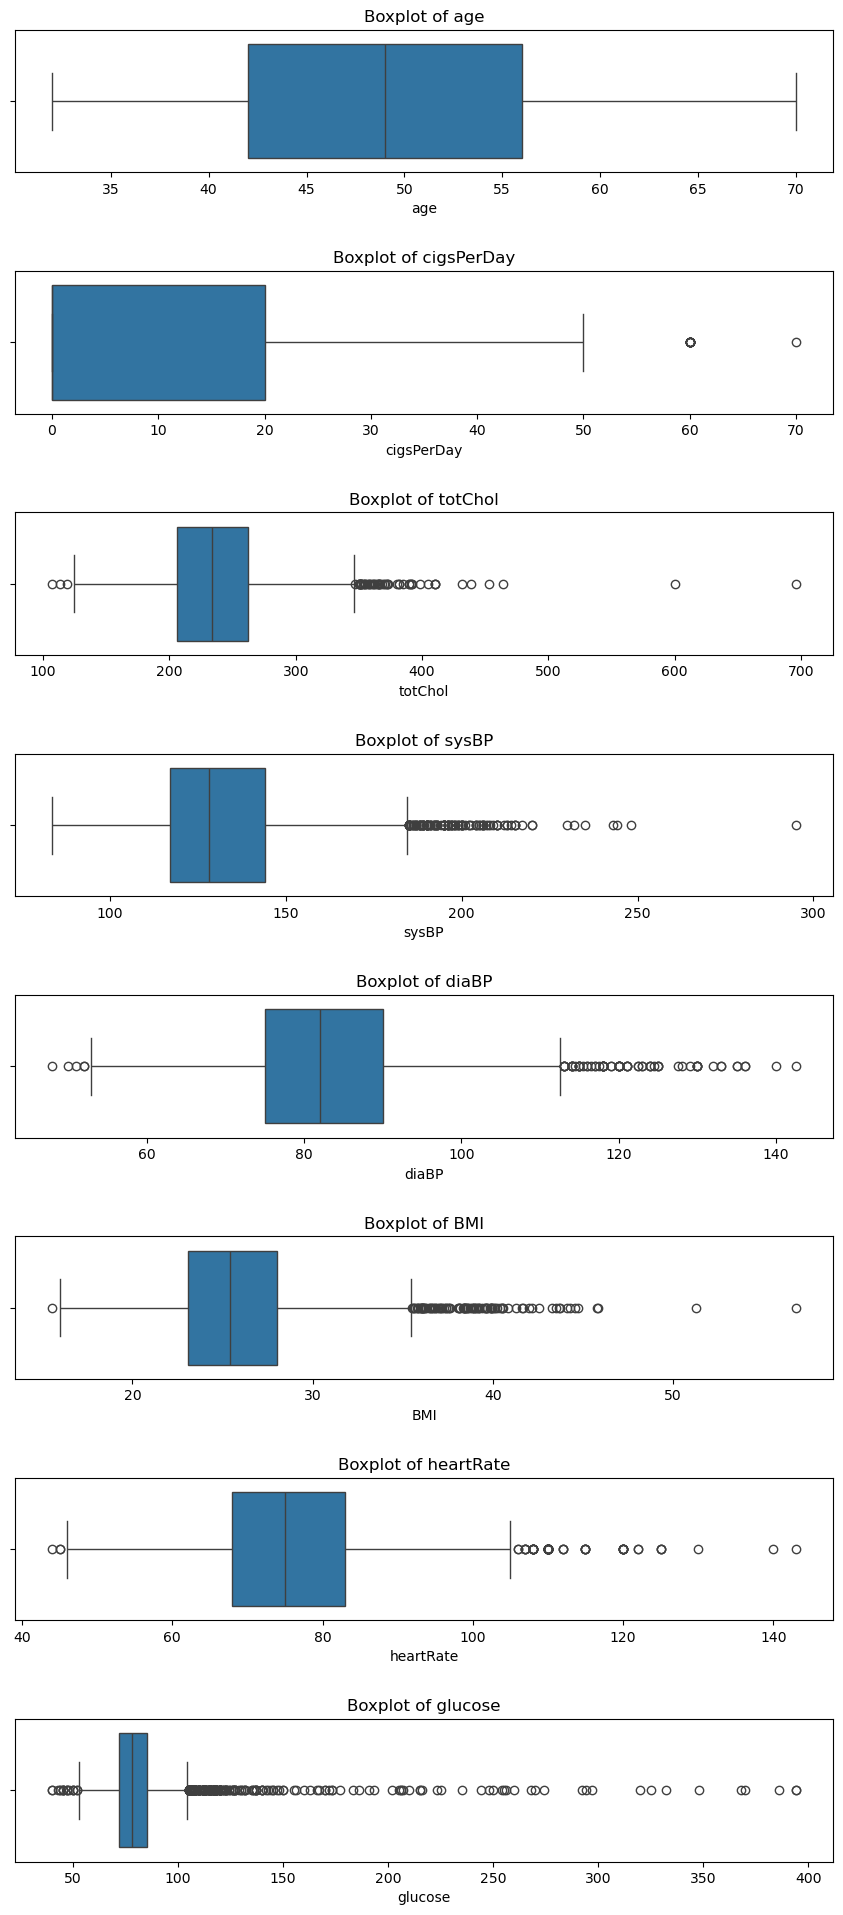

In [26]:
# Selecting continuous variables for outlier detection
continuous_cols = ['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']

# Plotting the boxplots for continuous variables
fig, axes = plt.subplots(len(continuous_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)
plt.savefig("plot_image2.png")
plt.show()

In [27]:
def handle_outliers_with_IQR(df, column):
    """ Handle outliers in a dataframe column using the IQR method.
        Values outside 1.5 * IQR from the Q1 and Q3 quartiles are considered outliers.
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)

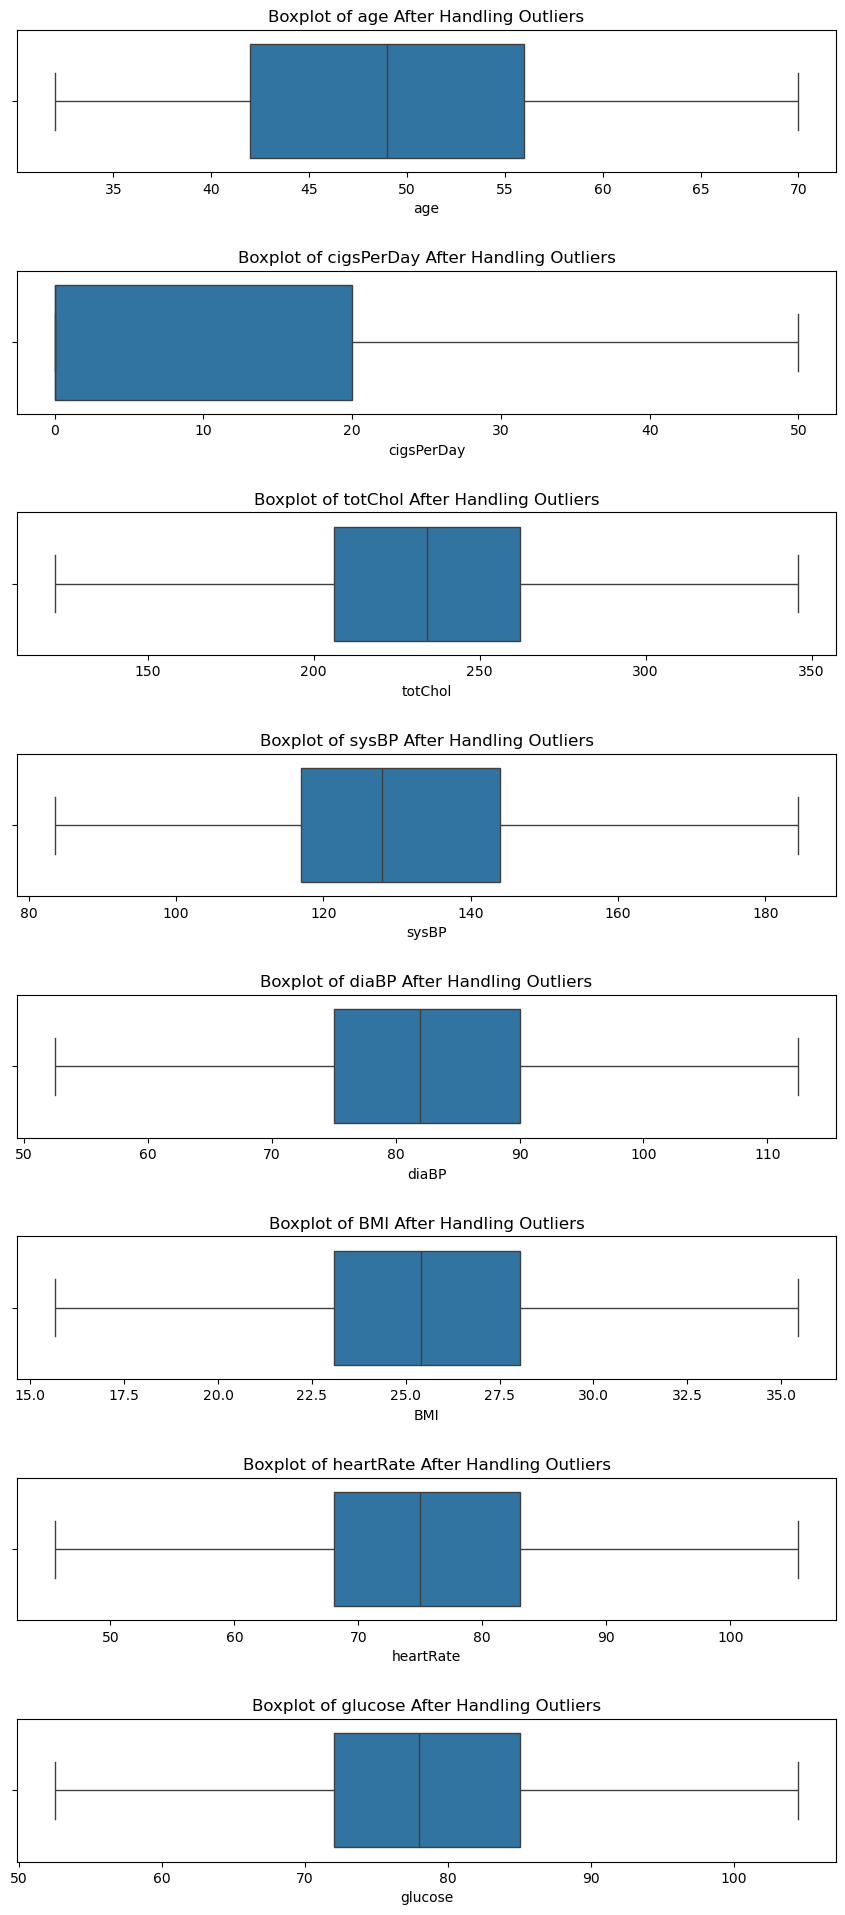

In [29]:
# Applying the IQR method to each continuous column
for col in continuous_cols:
    handle_outliers_with_IQR(data, col)

# Plotting the boxplots for continuous variables after handling outliers
fig, axes = plt.subplots(len(continuous_cols), 1, figsize=(10, 20))
fig.tight_layout(pad=5.0)

for i, col in enumerate(continuous_cols):
    sns.boxplot(x=data[col], ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} After Handling Outliers')
    axes[i].set_xlabel(col)
    #plt.savefig("plot_image3.png")
plt.show()

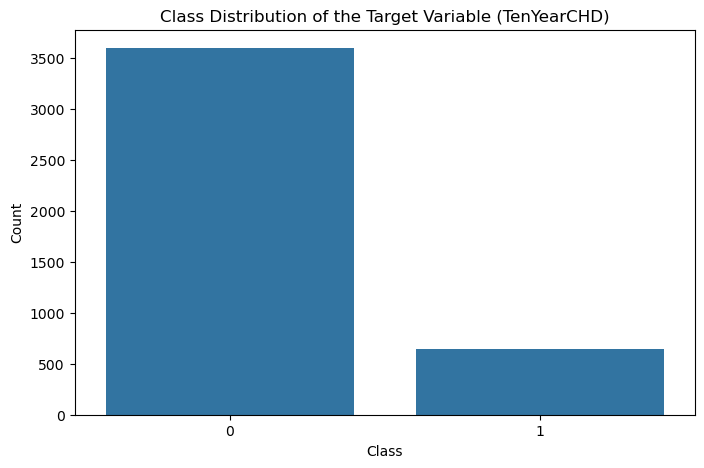

In [30]:
# Checking if the data is imbalanced
target_column = 'TenYearCHD'
class_counts = data[target_column].value_counts()

# Plotting the class distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.title('Class Distribution of the Target Variable (TenYearCHD)')
plt.xlabel('Class')
plt.ylabel('Count')
#plt.savefig("plot_image4.png")
plt.show()

In [31]:
class_counts

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

In [32]:
from sklearn.utils import resample

# Separate the minority and majority classes
data_majority = data[data[target_column] == 0]
data_minority = data[data[target_column] == 1]

In [39]:
# Upsample minority class
data_minority_upsampled = resample(data_minority, 
                                   replace=True,     # sample with replacement
                                   n_samples=len(data_majority),    # to match majority class
                                   random_state=123) # reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled])

# Display new class counts
upsampled_class_counts = data_upsampled[target_column].value_counts()

In [41]:
upsampled_class_counts

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

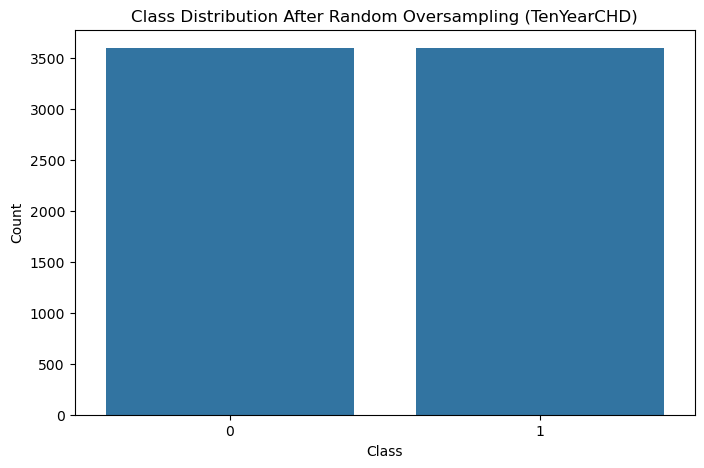

In [43]:
# Plotting the class distribution after resampling
plt.figure(figsize=(8, 5))
sns.barplot(x=upsampled_class_counts.index, y=upsampled_class_counts.values)
plt.title('Class Distribution After Random Oversampling (TenYearCHD)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.savefig("plot_image5.png")
plt.show()

In [45]:
import pandas as pd
from sklearn.model_selection import train_test_split
# Splitting the dataset into features and target variable
X = data_upsampled.drop('TenYearCHD', axis=1)
y = data_upsampled['TenYearCHD']
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

C:\Users\hp\AppData\Local\Temp\ipykernel_8080\2125264955.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='viridis')


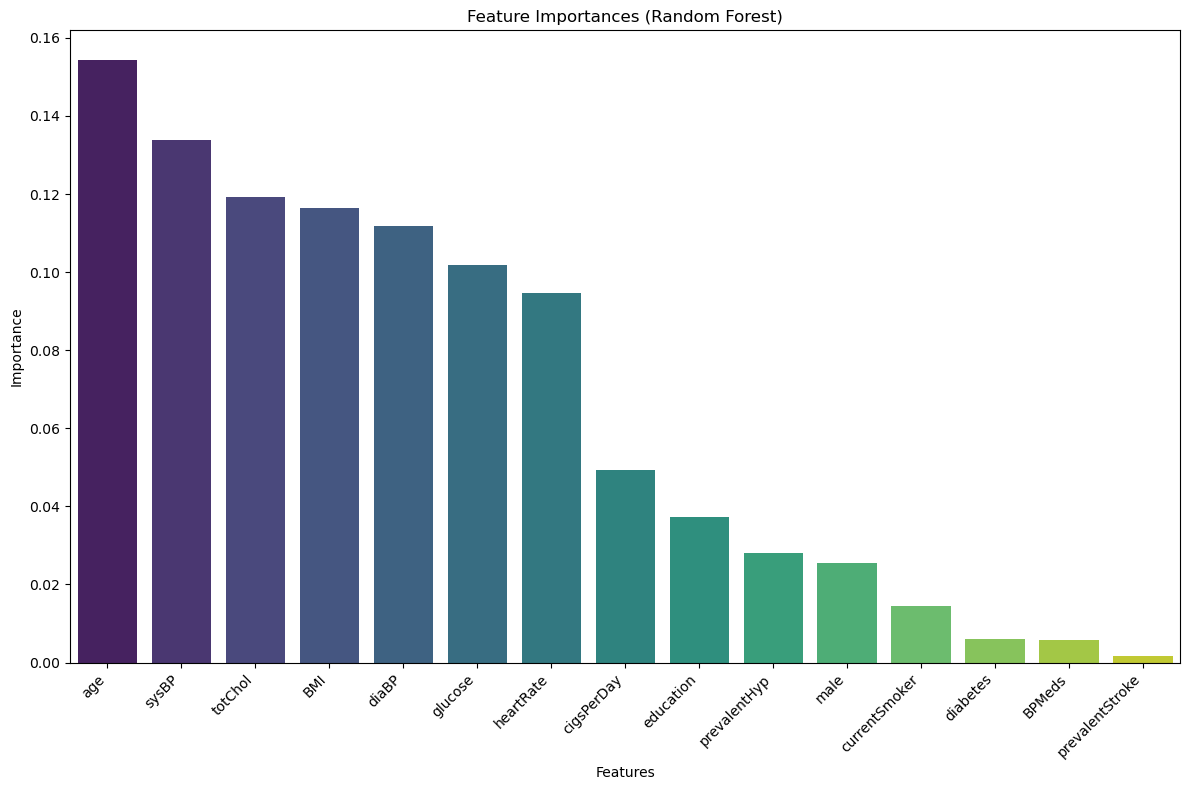

            Feature  Importance
0               age    0.154229
1             sysBP    0.133885
2           totChol    0.119218
3               BMI    0.116520
4             diaBP    0.111806
5           glucose    0.101803
6         heartRate    0.094601
7        cigsPerDay    0.049236
8         education    0.037395
9      prevalentHyp    0.028090
10             male    0.025416
11    currentSmoker    0.014445
12         diabetes    0.006093
13           BPMeds    0.005683
14  prevalentStroke    0.001581


In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the data
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Create a DataFrame for feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns[indices],
    'Importance': importances[indices]
})

# Plot the feature importances using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data=feature_importance_df, palette='viridis')
plt.title("Feature Importances (Random Forest)")
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
#plt.savefig("framingham_RF_image.png")
plt.show()

# Display the sorted feature importance DataFrame
print(feature_importance_df)


C:\Users\hp\AppData\Local\Temp\ipykernel_8080\1377519770.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Chi2 Score', data=chi2_scores_df, palette='viridis')


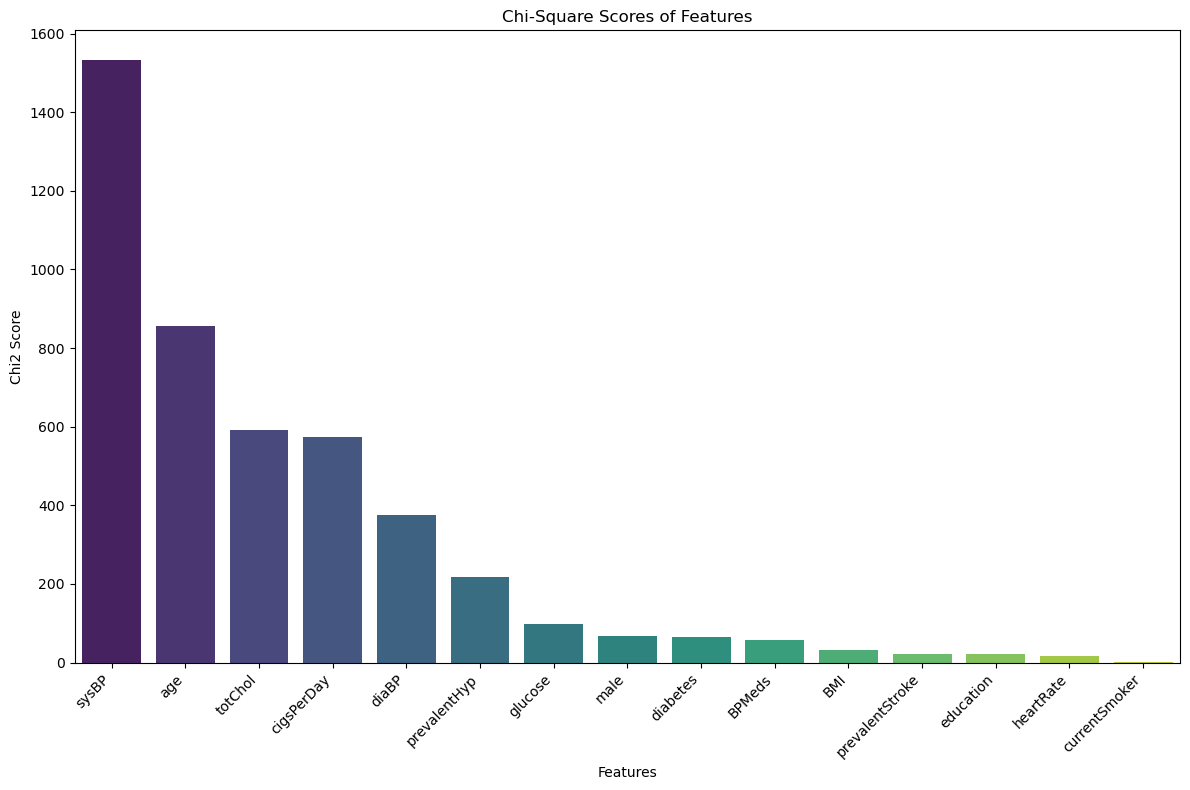

            Feature   Chi2 Score        P-value
10            sysBP  1531.754439   0.000000e+00
1               age   855.427207  4.804900e-188
9           totChol   592.448841  7.349425e-131
4        cigsPerDay   572.896846  1.315763e-126
11            diaBP   376.442855   7.403158e-84
7      prevalentHyp   218.045806   2.413523e-49
14          glucose    98.321006   3.557718e-23
0              male    67.320333   2.307888e-16
8          diabetes    64.359037   1.036917e-15
5            BPMeds    58.230157   2.331770e-14
12              BMI    31.076875   2.480085e-08
6   prevalentStroke    22.807017   1.791106e-06
2         education    21.115274   4.324672e-06
13        heartRate    15.588962   7.871275e-05
3     currentSmoker     2.464159   1.164700e-01


In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate chi-square statistics
chi2_selector = SelectKBest(chi2, k='all')
chi2_selector.fit(X_train, y_train)

# Get the chi-square scores and p-values
chi2_scores = chi2_selector.scores_
p_values = chi2_selector.pvalues_

# Create a DataFrame for easier visualization
chi2_scores_df = pd.DataFrame({'Feature': X_train.columns, 'Chi2 Score': chi2_scores, 'P-value': p_values})

# Sort the features by their chi-square scores
chi2_scores_df.sort_values(by='Chi2 Score', ascending=False, inplace=True)

# Plot the chi-square scores using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Chi2 Score', data=chi2_scores_df, palette='viridis')
plt.title('Chi-Square Scores of Features')
plt.xlabel('Features')
plt.ylabel('Chi2 Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("framingham_chi_square_image.png")
plt.show()

# Print the sorted DataFrame
print(chi2_scores_df)

C:\Users\hp\AppData\Local\Temp\ipykernel_8080\4286626460.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Importance', data=rfe_ranking_df, palette='viridis')


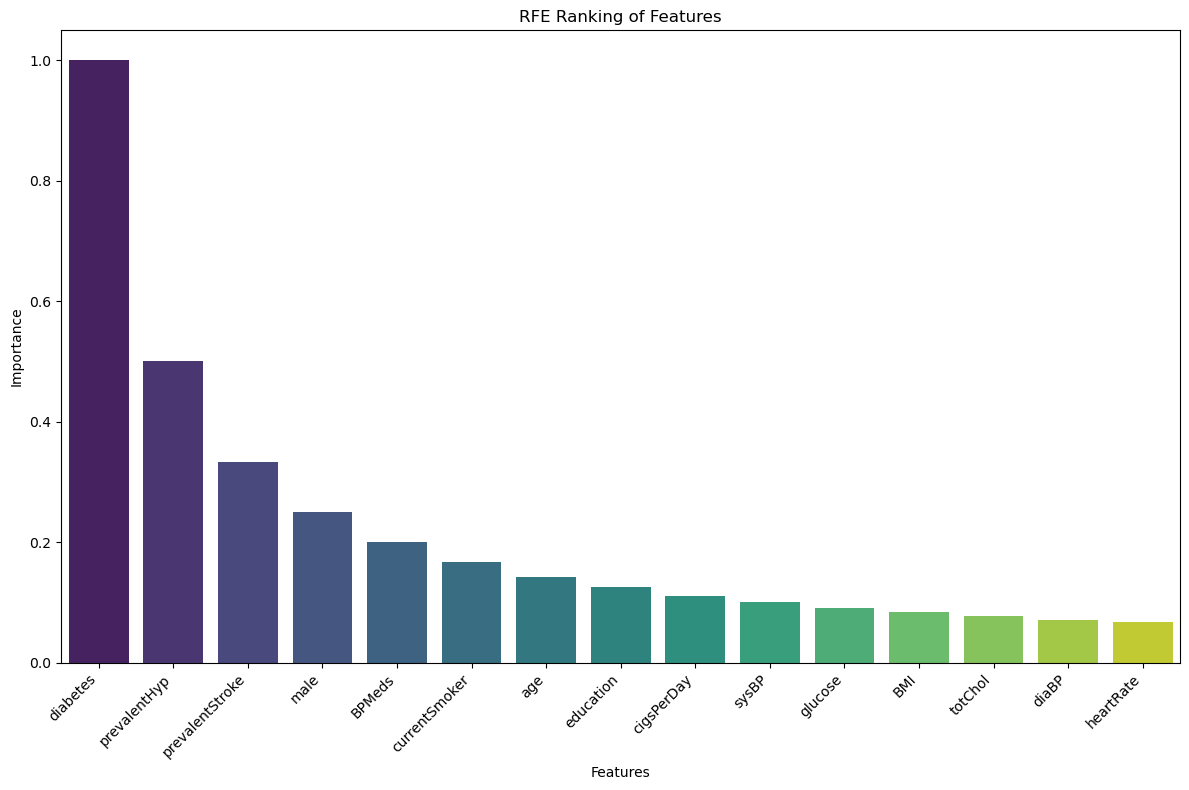

In [51]:
# Create the RFE object and specify the algorithm and number of features to select
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the model and RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=1)

# Fit the RFE model
rfe.fit(X_train, y_train)

# Get the ranking of each feature
ranking = rfe.ranking_

# Create a DataFrame for easier visualization
rfe_ranking_df = pd.DataFrame({'Feature': X_train.columns, 'Ranking': ranking})

# Sort the features by their ranking
rfe_ranking_df.sort_values(by='Ranking', inplace=True)

# Adjust rankings to align with feature importance style
rfe_ranking_df['Importance'] = 1 / rfe_ranking_df['Ranking']  # Simulating importance as inverse of ranking

# Plot the RFE rankings with Seaborn and similar styling
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='Importance', data=rfe_ranking_df, palette='viridis')
plt.title('RFE Ranking of Features')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig("framingham_RFE_image.png")
plt.show()


In [52]:
# Display the features with their importance values
print("Feature Importance:")
print(rfe_ranking_df)

Feature Importance:
            Feature  Ranking  Importance
8          diabetes        1    1.000000
7      prevalentHyp        2    0.500000
6   prevalentStroke        3    0.333333
0              male        4    0.250000
5            BPMeds        5    0.200000
3     currentSmoker        6    0.166667
1               age        7    0.142857
2         education        8    0.125000
4        cigsPerDay        9    0.111111
10            sysBP       10    0.100000
14          glucose       11    0.090909
12              BMI       12    0.083333
9           totChol       13    0.076923
11            diaBP       14    0.071429
13        heartRate       15    0.066667


C:\Users\hp\AppData\Local\Temp\ipykernel_8080\2288784320.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='F-Value', data=anova_results, palette='viridis')


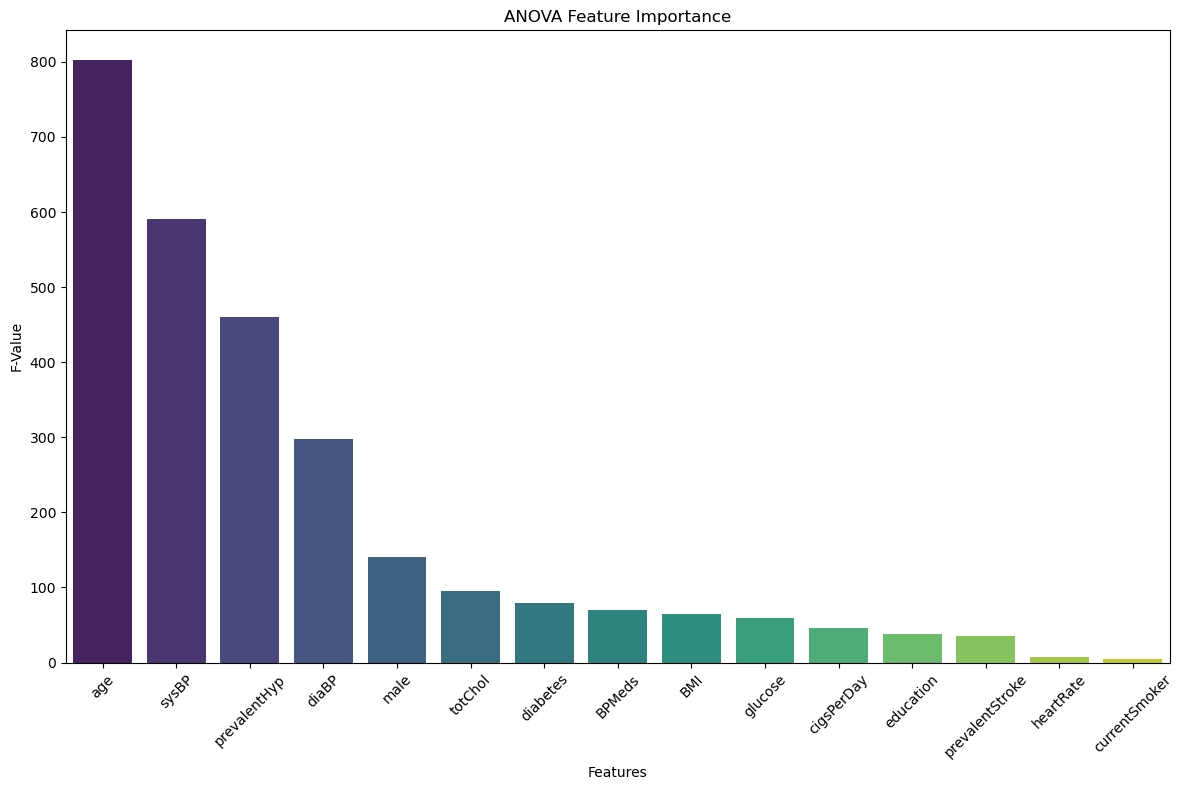

ANOVA Feature Selection Results:
            Feature     F-Value        P-Value
1               age  801.887604  2.444407e-167
10            sysBP  590.172468  2.327729e-125
7      prevalentHyp  460.617950   4.307149e-99
11            diaBP  297.102633   2.851763e-65
0              male  140.821492   3.510560e-32
9           totChol   95.350369   2.196361e-22
8          diabetes   78.978416   7.830181e-19
5            BPMeds   69.800821   7.800546e-17
12              BMI   65.181326   7.947425e-16
14          glucose   59.789908   1.199223e-14
4        cigsPerDay   45.657187   1.518871e-11
2         education   38.177969   6.810058e-10
6   prevalentStroke   35.236120   3.056352e-09
13        heartRate    7.818826   5.184204e-03
3     currentSmoker    4.114731   4.254806e-02


In [53]:
from sklearn.feature_selection import f_classif
from sklearn.preprocessing import KBinsDiscretizer, LabelEncoder
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Perform ANOVA F-test
f_values, p_values = f_classif(X, y)

# Create a DataFrame to store the results
anova_results = pd.DataFrame({
    'Feature': X.columns,
    'F-Value': f_values,
    'P-Value': p_values
})

# Sort the results by F-Value
anova_results = anova_results.sort_values(by='F-Value', ascending=False)

# Plot ANOVA Feature Importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Feature', y='F-Value', data=anova_results, palette='viridis')
plt.title('ANOVA Feature Importance')
plt.xlabel('Features')
plt.ylabel('F-Value')
plt.xticks(rotation=45)
plt.tight_layout()
#plt.savefig("mckinsey_anova_image.png")
plt.show()

# Display the ANOVA results
print("ANOVA Feature Selection Results:")
print(anova_results[['Feature', 'F-Value', 'P-Value']])

In [57]:
df= data

In [59]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [61]:
df = df.drop(columns=['heartRate','currentSmoker'])

In [63]:
df.head()

,male,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,glucose,TenYearCHD
0,1,39,4.0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,77.0,0
1,0,46,2.0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,76.0,0
2,1,48,1.0,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,70.0,0
3,0,61,3.0,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,103.0,1
4,0,46,3.0,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,0


In [65]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
categorical_columns = df.select_dtypes(include=['object']).columns  # Identify non-numeric columns
for col in categorical_columns:
    df[col] = LabelEncoder().fit_transform(df[col])  # Apply Label Encoding

# Ensure all data is numeric
df = df.apply(pd.to_numeric, errors='coerce')
# Define features (X) and target variable (y)
X = df.drop(columns=['TenYearCHD']) 
y = df['TenYearCHD']

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Apply Robust Scaler to handle outliers and skewed data
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train SVM classifier with RBF kernel
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svm_model.fit(X_train_scaled, y_train_smote)

# Predictions on test data
y_pred = svm_model.predict(X_test_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.6261792452830188

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.66      0.75       719
           1       0.18      0.41      0.25       129

    accuracy                           0.63       848
   macro avg       0.52      0.54      0.50       848
weighted avg       0.76      0.63      0.67       848


Confusion Matrix:
 [[478 241]
 [ 76  53]]


In [67]:
import pandas as pd
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler, LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Apply Robust Scaler
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)

# Train XGBoost classifier
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
xgb_model.fit(X_train_scaled, y_train_smote)

# Predictions on test data
y_pred = xgb_model.predict(X_test_scaled)

# Evaluate Model Performance
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Model Accuracy: 0.7924528301886793

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       719
           1       0.22      0.14      0.17       129

    accuracy                           0.79       848
   macro avg       0.54      0.52      0.53       848
weighted avg       0.76      0.79      0.77       848


Confusion Matrix:
 [[654  65]
 [111  18]]


In [69]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report


# Apply RobustScaler to handle outliers before feeding data into MLP
scaler = RobustScaler()
X_train_scaled = scaler.fit_transform(X_train_smote)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler for test data

# Define and train the MLP Classifier
mlp = MLPClassifier(hidden_layer_sizes=(128, 64, 32), activation='relu', solver='adam', max_iter=500, random_state=42)
mlp.fit(X_train_scaled, y_train_smote)

# Predict on test set
y_pred = mlp.predict(X_test_scaled)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"MLP Classifier Accuracy: {accuracy:.4f}")
print("Classification Report:\n", report)

MLP Classifier Accuracy: 0.7146
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83       719
           1       0.19      0.26      0.22       129

    accuracy                           0.71       848
   macro avg       0.52      0.53      0.52       848
weighted avg       0.76      0.71      0.73       848

